In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mlflow.models import infer_signature
import json
import datetime

2025/03/10 13:31:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


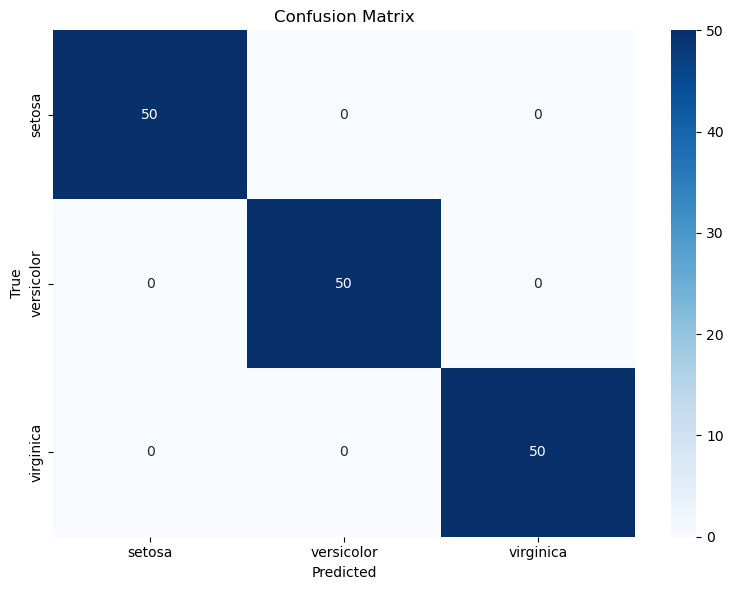

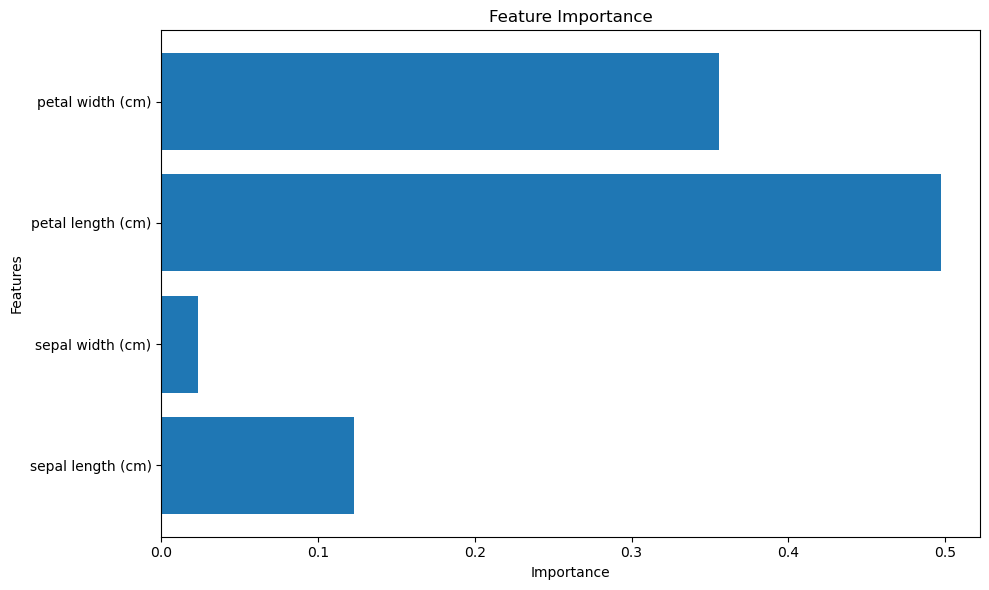

In [1]:


# Start MLflow run
with mlflow.start_run():
   
    and load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Log the dataset used
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", list(iris.feature_names))
    mlflow.log_param("target", iris.target_names.tolist())

    # Log experiment metadata
    experiment_metadata = {
        "experiment_id": mlflow.active_run().info.run_id,
        "model_name": "RandomForestClassifier",
        "algorithm": "Random Forest",
        "dataset_used": "Iris",
        "training_date": datetime.datetime.now().strftime("%Y-%m-%d"),
        "trained_by": "Reema",  # Replace with your details
        "data_preprocessing": {
            "missing_values": {
                "strategy": "Imputation",
                "affected_columns": list(iris.feature_names),
                "imputation_method": "Mean"
            },
            "feature_scaling": {
                "scaling_method": "Standardization",
                "applied_columns": list(iris.feature_names)
            },
            "encoding": {
                "categorical_encoding": "None",
                "affected_columns": []
            },
            "outlier_handling": {
                "strategy": "None",
                "affected_columns": [],
                "detection_method": "None"
            },
            "data_transformation": {
                "applied_methods": ["Standardization"],
                "reason_for_transformation": "Improves model performance for distance-based algorithms"
            },
            "data_splits": {
                "train_test_split": "80-20",
                "cross_validation_folds": 5
            }
        },
        "hyperparameters": {
            "learning_rate": 0.0,
            "batch_size": 0,
            "epochs": 0,
            "optimizer": "Adam",
            "loss_function": "Cross-entropy"
        },
        "performance_metrics": {
            "accuracy": 0.0,
            "f1_score": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "auc_roc": 0.0,
            "loss":  0.0
        },
        "model_explainability": {
            "explainability_report": "SHAP, LIME (placeholder)",
            "feature_importance": ["List of most important features impacting model predictions"],
            "explainability_score": "Placeholder"
        },
        "dependencies": ["scikit-learn", "matplotlib", "seaborn"],
        "environment": "OS: Linux, CPU: Intel i7, RAM: 16GB",
        "model_artifact_location": "models/random_forest_iris/",
        "license": "MIT",
        "source_code": "GitHub link here",
        "training_logs": "Link to logs",
        "previous_model": "None",
        "next_model": "Placeholder",
        "derived_from": "Original Iris dataset",
        "model_card": "Standard model documentation available here",
        "validation_results": {
            "dataset_id": "Iris DOI here",
            "validation_metrics": {
                "accuracy": 0.0,
                "f1_score": 0.0,
                "precision": 0.0,
                "recall": 0.0
            }
        },
        "deployment_status": "Inactive",
        "deployment_endpoint": "URL to deployed model",
        "reproducibility_guidelines": "Steps to reproduce the training pipeline",
        "bias_analysis": {
            "bias_check_method": "Disparate impact",
            "identified_bias": "No significant bias detected",
            "mitigation_strategies": "None"
        }
    }

    # Log all experiment metadata
    mlflow.log_param("experiment_metadata", json.dumps(experiment_metadata, indent=4))

    # Step 1: Data Preprocessing - Check for missing values
    imputation_strategy = "mean"
    imputer = SimpleImputer(strategy=imputation_strategy)

    # Check and impute missing values
    X = imputer.fit_transform(X)
    mlflow.log_param("imputation_strategy", imputation_strategy)

    # Justification for imputation strategy
    justification_imputation = """
    Chose mean imputation strategy as the dataset contains numerical values that are missing randomly,
    and the mean is expected to provide an unbiased estimate.
    """
    with open("justification_imputation.txt", "w") as f:
        f.write(justification_imputation)
    mlflow.log_artifact("justification_imputation.txt")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Log the scaling method used
    mlflow.log_param("scaling_method", "StandardScaler")

    # Justification for scaling method
    justification_scaling = """
    Used StandardScaler to normalize the features and improve the model's ability to learn, 
    especially when working with distance-based algorithms like Random Forest.
    """
    with open("justification_scaling.txt", "w") as f:
        f.write(justification_scaling)
    mlflow.log_artifact("justification_scaling.txt")

    # Step 3: Train the model (Random Forest)
    model_choice = "RandomForestClassifier"
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)

    # Log model parameters and choice
    mlflow.log_param("model_choice", model_choice)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Justification for model choice
    justification_model_choice = """
    Chose Random Forest Classifier due to its robustness in handling non-linear relationships, 
    and its ability to handle both categorical and numerical features. It also performs well on small datasets.
    """
    with open("justification_model_choice.txt", "w") as f:
        f.write(justification_model_choice)
    mlflow.log_artifact("justification_model_choice.txt")

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Log additional evaluation metrics such as confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Step 5: Log feature importance (for Random Forest)
    feature_importance = model.feature_importances_
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(iris.feature_names, feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")

    # Log the model
    mlflow.sklearn.log_model(model, "model")

    # Step 6: Save a JSON file with decision-making transparency
    transparency_details = {
        "model_artifact_location": "models/random_forest_iris/",
        "confusion_matrix_link": "confusion_matrix.png",
        "feature_importance_link": "feature_importance.png",
        "experiment_metadata": experiment_metadata
    }

    # Save the transparency details as a JSON artifact
    with open("ml_meta.json", "w") as json_file:
        json.dump(transparency_details, json_file, indent=4)
    mlflow.log_artifact("ml_meta.json")
    mlflow.end_run()


^C


In [3]:
!pip uninstall -y mlflow

Found existing installation: mlflow 2.20.3
Uninstalling mlflow-2.20.3:
  Successfully uninstalled mlflow-2.20.3


In [4]:
!pip install mlflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached mlflow-2.20.3-py3-none-any.whl.metadata (30 kB)
Using cached mlflow-2.20.3-py3-none-any.whl (28.4 MB)


In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# import json
# import datetime

# # Start MLflow run
# with mlflow.start_run():

#     # Define the dataset and load the Iris data
#     iris = load_iris()
#     X = iris.data
#     y = iris.target
#     # Prepare a sample input (it should match the shape and type of the model's expected input)
#     input_example = X[0].reshape(1, -1)  # Example input (first sample in the dataset)
    
#     # Log the model with the input example
#     mlflow.sklearn.log_model(model, "model", input_example=input_example)

#     # Log the dataset used
#     mlflow.log_param("dataset_used", "Iris")
#     mlflow.log_param("features", list(iris.feature_names))
#     mlflow.log_param("target", iris.target_names.tolist())

#     # Log experiment metadata
#     experiment_metadata = {
#         "experiment_id": mlflow.active_run().info.run_id,
#         "model_name": "RandomForestClassifier",
#         "algorithm": "Random Forest",
#         "dataset_used": "Iris",
#         "training_date": datetime.datetime.now().strftime("%Y-%m-%d"),
#         "trained_by": "Reema",  # Replace with your details
#         "data_preprocessing": {
#             "missing_values": {
#                 "strategy": "Imputation",
#                 "affected_columns": list(iris.feature_names),
#                 "imputation_method": "Mean"
#             },
#             "feature_scaling": {
#                 "scaling_method": "Standardization",
#                 "applied_columns": list(iris.feature_names)
#             },
#             "encoding": {
#                 "categorical_encoding": "None",
#                 "affected_columns": []
#             },
#             "outlier_handling": {
#                 "strategy": "None",
#                 "affected_columns": [],
#                 "detection_method": "None"
#             },
#             "data_transformation": {
#                 "applied_methods": ["Standardization"],
#                 "reason_for_transformation": "Improves model performance for distance-based algorithms"
#             },
#             "data_splits": {
#                 "train_test_split": "80-20",
#                 "cross_validation_folds": 5
#             }
#         },
#         "hyperparameters": {
#             "learning_rate": 0.0,
#             "batch_size": 0,
#             "epochs": 0,
#             "optimizer": "Adam",
#             "loss_function": "Cross-entropy"
#         },
#         "performance_metrics": {
#             "accuracy": 0.0,
#             "f1_score": 0.0,
#             "precision": 0.0,
#             "recall": 0.0,
#             "auc_roc": 0.0,
#             "loss":  0.0
#         },
#         "model_explainability": {
#             "explainability_report": "SHAP, LIME (placeholder)",
#             "feature_importance": ["List of most important features impacting model predictions"],
#             "explainability_score": "Placeholder"
#         },
#         "dependencies": ["scikit-learn", "matplotlib", "seaborn"],
#         "environment": "OS: Linux, CPU: Intel i7, RAM: 16GB",
#         "model_artifact_location": "models/random_forest_iris/",
#         "license": "MIT",
#         "source_code": "GitHub link here",
#         "training_logs": "Link to logs",
#         "previous_model": "None",
#         "next_model": "Placeholder",
#         "derived_from": "Original Iris dataset",
#         "model_card": "Standard model documentation available here",
#         "validation_results": {
#             "dataset_id": "Iris DOI here",
#             "validation_metrics": {
#                 "accuracy": 0.0,
#                 "f1_score": 0.0,
#                 "precision": 0.0,
#                 "recall": 0.0
#             }
#         },
#         "deployment_status": "Inactive",
#         "deployment_endpoint": "URL to deployed model",
#         "reproducibility_guidelines": "Steps to reproduce the training pipeline",
#         "bias_analysis": {
#             "bias_check_method": "Disparate impact",
#             "identified_bias": "No significant bias detected",
#             "mitigation_strategies": "None"
#         }
#     }

#     # Log all experiment metadata
#     mlflow.log_param("experiment_metadata", json.dumps(experiment_metadata, indent=4))

#     # Step 1: Data Preprocessing - Check for missing values
#     imputation_strategy = "mean"
#     imputer = SimpleImputer(strategy=imputation_strategy)

#     # Check and impute missing values
#     X = imputer.fit_transform(X)
#     mlflow.log_param("imputation_strategy", imputation_strategy)

#     # Justification for imputation strategy
#     justification_imputation = """
#     Chose mean imputation strategy as the dataset contains numerical values that are missing randomly,
#     and the mean is expected to provide an unbiased estimate.
#     """
#     with open("justification_imputation.txt", "w") as f:
#         f.write(justification_imputation)
#     mlflow.log_artifact("justification_imputation.txt")

#     # Step 2: Standardization of Features
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)

#     # Log the scaling method used
#     mlflow.log_param("scaling_method", "StandardScaler")

#     # Justification for scaling method
#     justification_scaling = """
#     Used StandardScaler to normalize the features and improve the model's ability to learn, 
#     especially when working with distance-based algorithms like Random Forest.
#     """
#     with open("justification_scaling.txt", "w") as f:
#         f.write(justification_scaling)
#     mlflow.log_artifact("justification_scaling.txt")

#     # Step 3: Train the model (Random Forest)
#     model_choice = "RandomForestClassifier"
#     model = RandomForestClassifier(n_estimators=100, max_depth=10)
#     model.fit(X, y)

#     # Log model parameters and choice
#     mlflow.log_param("model_choice", model_choice)
#     mlflow.log_param("n_estimators", 100)
#     mlflow.log_param("max_depth", 10)

#     # Justification for model choice
#     justification_model_choice = """
#     Chose Random Forest Classifier due to its robustness in handling non-linear relationships, 
#     and its ability to handle both categorical and numerical features. It also performs well on small datasets.
#     """
#     with open("justification_model_choice.txt", "w") as f:
#         f.write(justification_model_choice)
#     mlflow.log_artifact("justification_model_choice.txt")

#     # Step 4: Evaluate the model
#     y_pred = model.predict(X)
#     accuracy = accuracy_score(y, y_pred)
#     f1 = f1_score(y, y_pred, average='weighted')
#     precision = precision_score(y, y_pred, average='weighted')
#     recall = recall_score(y, y_pred, average='weighted')
#     auc_roc = roc_auc_score(y, model.predict_proba(X), multi_class='ovr')

#     # Prepare performance metrics object
#     mlflowlog = {
#         "accuracy": accuracy,
#         "f1_score": f1,
#         "precision": precision,
#         "recall": recall,
#         "auc_roc": auc_roc
#     }

#     # Log performance metrics from mlflowlog
#     for metric, value in mlflowlog.items():
#         mlflow.log_metric(metric, value)

#     # Log confusion matrix
#     cm = confusion_matrix(y, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("True")
#     plt.tight_layout()
#     plt.savefig("confusion_matrix.png")
#     mlflow.log_artifact("confusion_matrix.png")

#     # Step 5: Log feature importance (for Random Forest)
#     feature_importance = model.feature_importances_
    
#     # Plot feature importance
#     plt.figure(figsize=(10, 6))
#     plt.barh(iris.feature_names, feature_importance)
#     plt.title("Feature Importance")
#     plt.xlabel("Importance")
#     plt.ylabel("Features")
#     plt.tight_layout()
#     plt.savefig("feature_importance.png")
#     mlflow.log_artifact("feature_importance.png")

#     # Log the model
#     mlflow.sklearn.log_model(model, "model")

#     # Step 6: Save a JSON file with decision-making transparency
#     transparency_details = {
#         "model_artifact_location": "models/random_forest_iris/",
#         "confusion_matrix_link": "confusion_matrix.png",
#         "feature_importance_link": "feature_importance.png",
#         "experiment_metadata": experiment_metadata
#     }

#     # Save the transparency details as a JSON artifact
#     # with open("ml_meta.json", "w") as json_file:
#     #     json.dump(transparency_details, json_file, indent=4)
#     mlflow.log_artifact("example.txt")
#     mlflow.end_run()


In [ ]:
mlflow.log_artifact("example.txt")

2025/03/10 21:01:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed successfully!


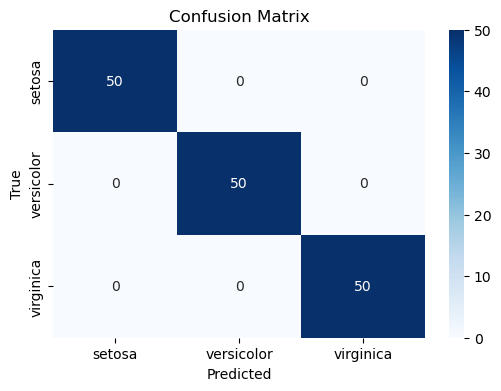

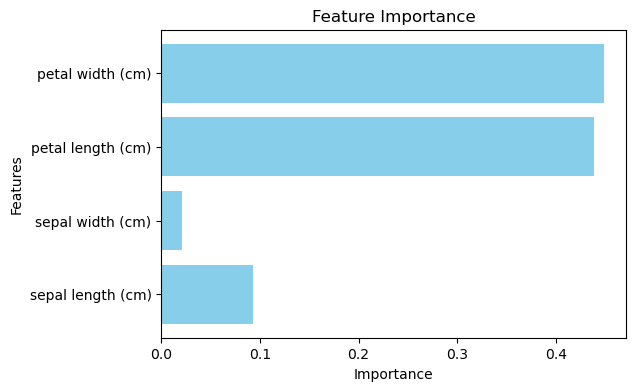

In [2]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Log the dataset used
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", iris.feature_names)
    mlflow.log_param("target", list(iris.target_names))

    # Experiment metadata
    experiment_metadata = {
        "experiment_id": mlflow.active_run().info.run_id,
        "model_name": "RandomForestClassifier",
        "algorithm": "Random Forest",
        "dataset_used": "Iris",
        "training_date": datetime.datetime.now().strftime("%Y-%m-%d"),
        "trained_by": "Reema",
        "data_preprocessing": {
            "missing_values": {
                "strategy": "Imputation",
                "affected_columns": iris.feature_names,
                "imputation_method": "Mean"
            },
            "feature_scaling": {
                "scaling_method": "Standardization",
                "applied_columns": iris.feature_names
            }
        },
        "data_splits": {
            "train_test_split": "80-20",
            "cross_validation_folds": 5
        },
        "hyperparameters": {
            "n_estimators": 100,
            "max_depth": 10
        },
        "deployment_status": "Inactive"
    }

    # Save experiment metadata as a JSON artifact
    with open("experiment_metadata.json", "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)
    mlflow.log_artifact("experiment_metadata.json")

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

print("MLflow run completed successfully!")


2025/03/10 21:14:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed successfully! Metadata saved in JSON.


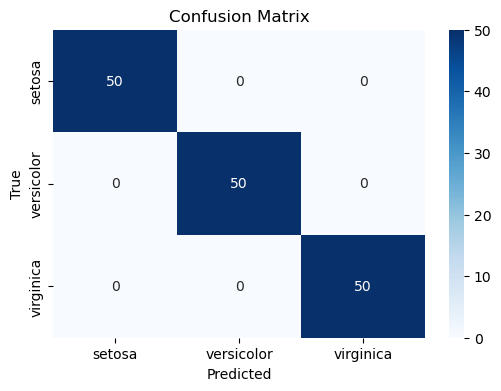

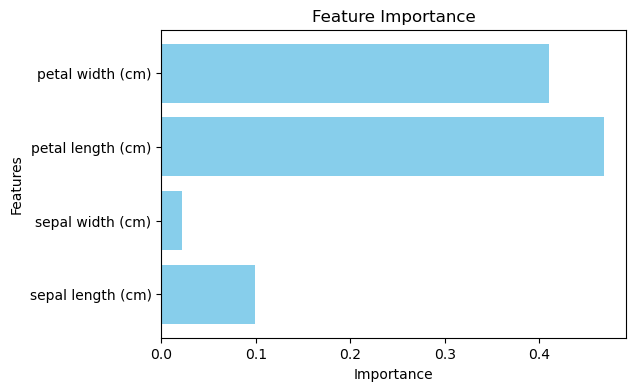

In [10]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Initialize experiment metadata dictionary
    experiment_metadata = {
        "experiment_id": mlflow.active_run().info.run_id,
        "model_name": "RandomForestClassifier",
        "algorithm": "Random Forest",
        "dataset_used": "Iris",
        "training_date": datetime.datetime.now().strftime("%Y-%m-%d"),
        "trained_by": "Reema",
        "data_preprocessing": {},
        "data_splits": {
            "train_test_split": "80-20",
            "cross_validation_folds": 5
        },
        "hyperparameters": {
            "n_estimators": 100,
            "max_depth": 10
        },
        "metrics": {},
        "deployment_status": "Inactive"
    }

    # Log dataset details
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", iris.feature_names)
    mlflow.log_param("target", list(iris.target_names))

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    experiment_metadata["data_preprocessing"]["missing_values"] = {
        "strategy": "Imputation",
        "affected_columns": iris.feature_names,
        "imputation_method": "Mean"
    }
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    experiment_metadata["data_preprocessing"]["feature_scaling"] = {
        "scaling_method": "Standardization",
        "applied_columns": iris.feature_names
    }
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    experiment_metadata["metrics"]["accuracy"] = accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Save confusion matrix in JSON
    experiment_metadata["metrics"]["confusion_matrix"] = cm.tolist()

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    
    # Save feature importance in JSON
    experiment_metadata["metrics"]["feature_importance"] = dict(zip(iris.feature_names, feature_importance))

    # Save updated metadata as a JSON file
    json_filename = "new_test.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)
    
    # Log JSON as an MLflow artifact
    mlflow.log_artifact('mlflow.txt')

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

print("MLflow run completed successfully! Metadata saved in JSON.")


2025/03/10 21:21:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed successfully! Metadata saved in JSON.


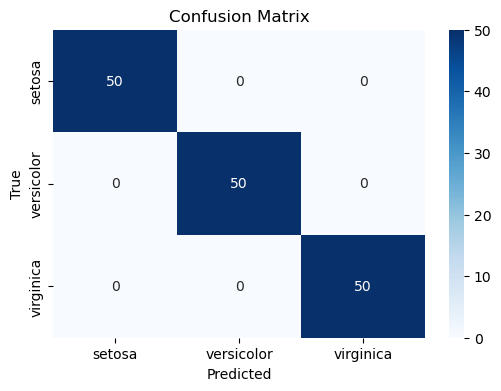

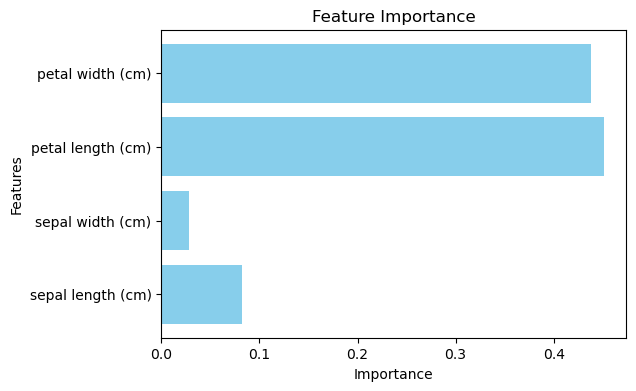

In [11]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Initialize experiment metadata dictionary
    experiment_metadata = {
        "experiment_id": mlflow.active_run().info.run_id,
        "model_name": "RandomForestClassifier",
        "algorithm": "Random Forest",
        "dataset_used": "Iris",
        "training_date": datetime.datetime.now().strftime("%Y-%m-%d"),
        "trained_by": "Reema",
        "data_preprocessing": {},
        "data_splits": {
            "train_test_split": "80-20",
            "cross_validation_folds": 5
        },
        "hyperparameters": {
            "n_estimators": 100,
            "max_depth": 10
        },
        "metrics": {},
        "deployment_status": "Inactive"
    }

    # Log dataset details
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", iris.feature_names)
    mlflow.log_param("target", list(iris.target_names))

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    experiment_metadata["data_preprocessing"]["missing_values"] = {
        "strategy": "Imputation",
        "affected_columns": iris.feature_names,
        "imputation_method": "Mean"
    }
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    experiment_metadata["data_preprocessing"]["feature_scaling"] = {
        "scaling_method": "Standardization",
        "applied_columns": iris.feature_names
    }
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    experiment_metadata["metrics"]["accuracy"] = accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Save confusion matrix in JSON
    experiment_metadata["metrics"]["confusion_matrix"] = cm.tolist()

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    
    # Save feature importance in JSON
    experiment_metadata["metrics"]["feature_importance"] = dict(zip(iris.feature_names, feature_importance))

    # Save updated metadata as a JSON file
    json_filename = "new_test.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)
    
    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

print("MLflow run completed successfully! Metadata saved in JSON.")
